In [1]:
# Part 3C)
import numpy as np
import matplotlib.pyplot as plt  

# Problem definition
U = 2 # km/sec
sigma_o = 0.5 # sec 

# Corresponding to case i and ii respectively
cases = 2
Ds  = [400,100] # km 
x1s = [0,0]
x2s = [D for D in Ds]
y1s = [0,0]
y2s = [0,0]
t1s = [56,56]  # sec
t2s = [152,25] 

In [2]:
# Defining the variational optimsiation function J(x,y) 
def J_op(x,y,x1,x2,y1,y2,t1,t2,sigma_o,U):
    return 1/(U*2*sigma_o**2) * (( np.sqrt((x-x1)**2+(y-y1)**2) - t1)**2 + (np.sqrt((x-x2)**2 + (y-y2)**2) - t2)**2 )
    

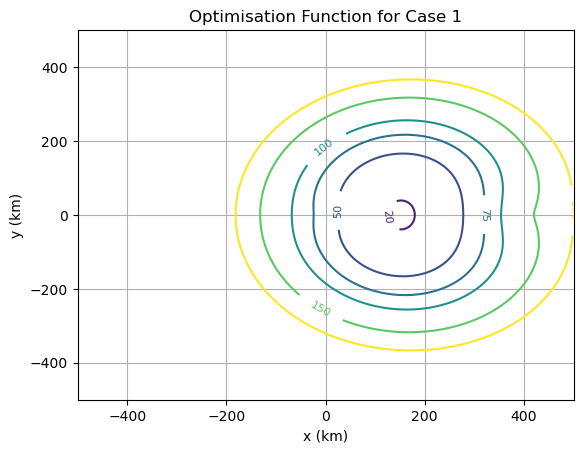

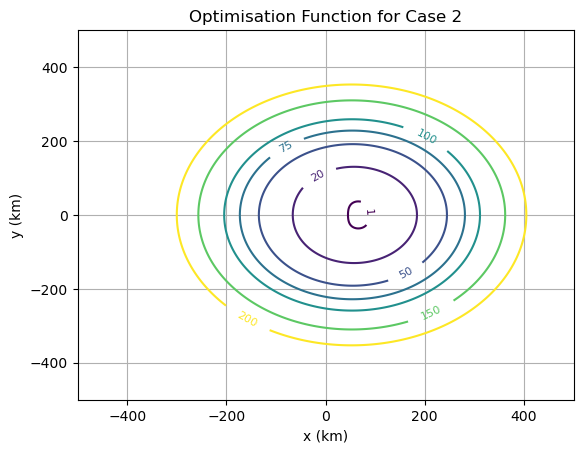

In [3]:
# Levels for tracing the J contours
J_cont = [1,20,50,75,100,150,200]

# Defining the grid
n = 1000
domain = 800 #km
lims = 500
xs = np.linspace(-domain,domain,n)
ys = np.linspace(-domain,domain,n)

for i in range(cases):
    
    # There is either an error with J_op or there's another scaling issue
    # Dividing the result by 1000 seems to give reasonable graphs
    J = [[J_op(x,y,x1s[i],x2s[i],y1s[i],y2s[i],t1s[i],t2s[i],sigma_o,U)/1000 for x in xs] for y in ys]  
    
    contour = plt.contour(xs,ys,J,levels=J_cont)

    plt.clabel(contour, inline=True, fontsize=8)

    plt.xlim([-lims,lims])
    plt.ylim([-lims,lims])
    plt.grid()
    plt.title(f'Optimisation Function for Case {i+1}')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.show()
    
    